**Machine Learning Template**

Refer to the example provided by "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow" Chapter 2 "End-to-end Machine Learning project" at https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


In [1]:
!pip install scikit-learn==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


# Setup


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.3.2"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get the data


## 	Download the data from the Internet
Put the data into a pandas DataFrame object


In [3]:
import tarfile
import urllib.request

download_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

data_path = os.path.join("datasets", "housing")
if not os.path.isdir(data_path):
  os.makedirs(data_path)
tgz_path = os.path.join(data_path, "housing.tgz")

urllib.request.urlretrieve(download_url, tgz_path)

housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=data_path)
housing_tgz.close()


In [4]:
csv_path = os.path.join(data_path, "housing.csv")
housing = pd.read_csv(csv_path)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Take a quick look at the data strcture
DataFrame's functions:

`head()`: return the top five rows.

`info()`: get a quick description of the data, in particular the total number of rows, each attribute's type, and the number of nonnull values.

`value_counts()`: for a categorical attribute, find out what categories exist and how many districts belongs to each category.

`describe()`: summary of the numerical attributes, including mean, std, percentiles, and max.

`hist()`: a histogram showing the number of instances that have a given value range.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note: "total_bedrooms" has the missing data, and "ocean_provimity" is an object, not a float.

In [6]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


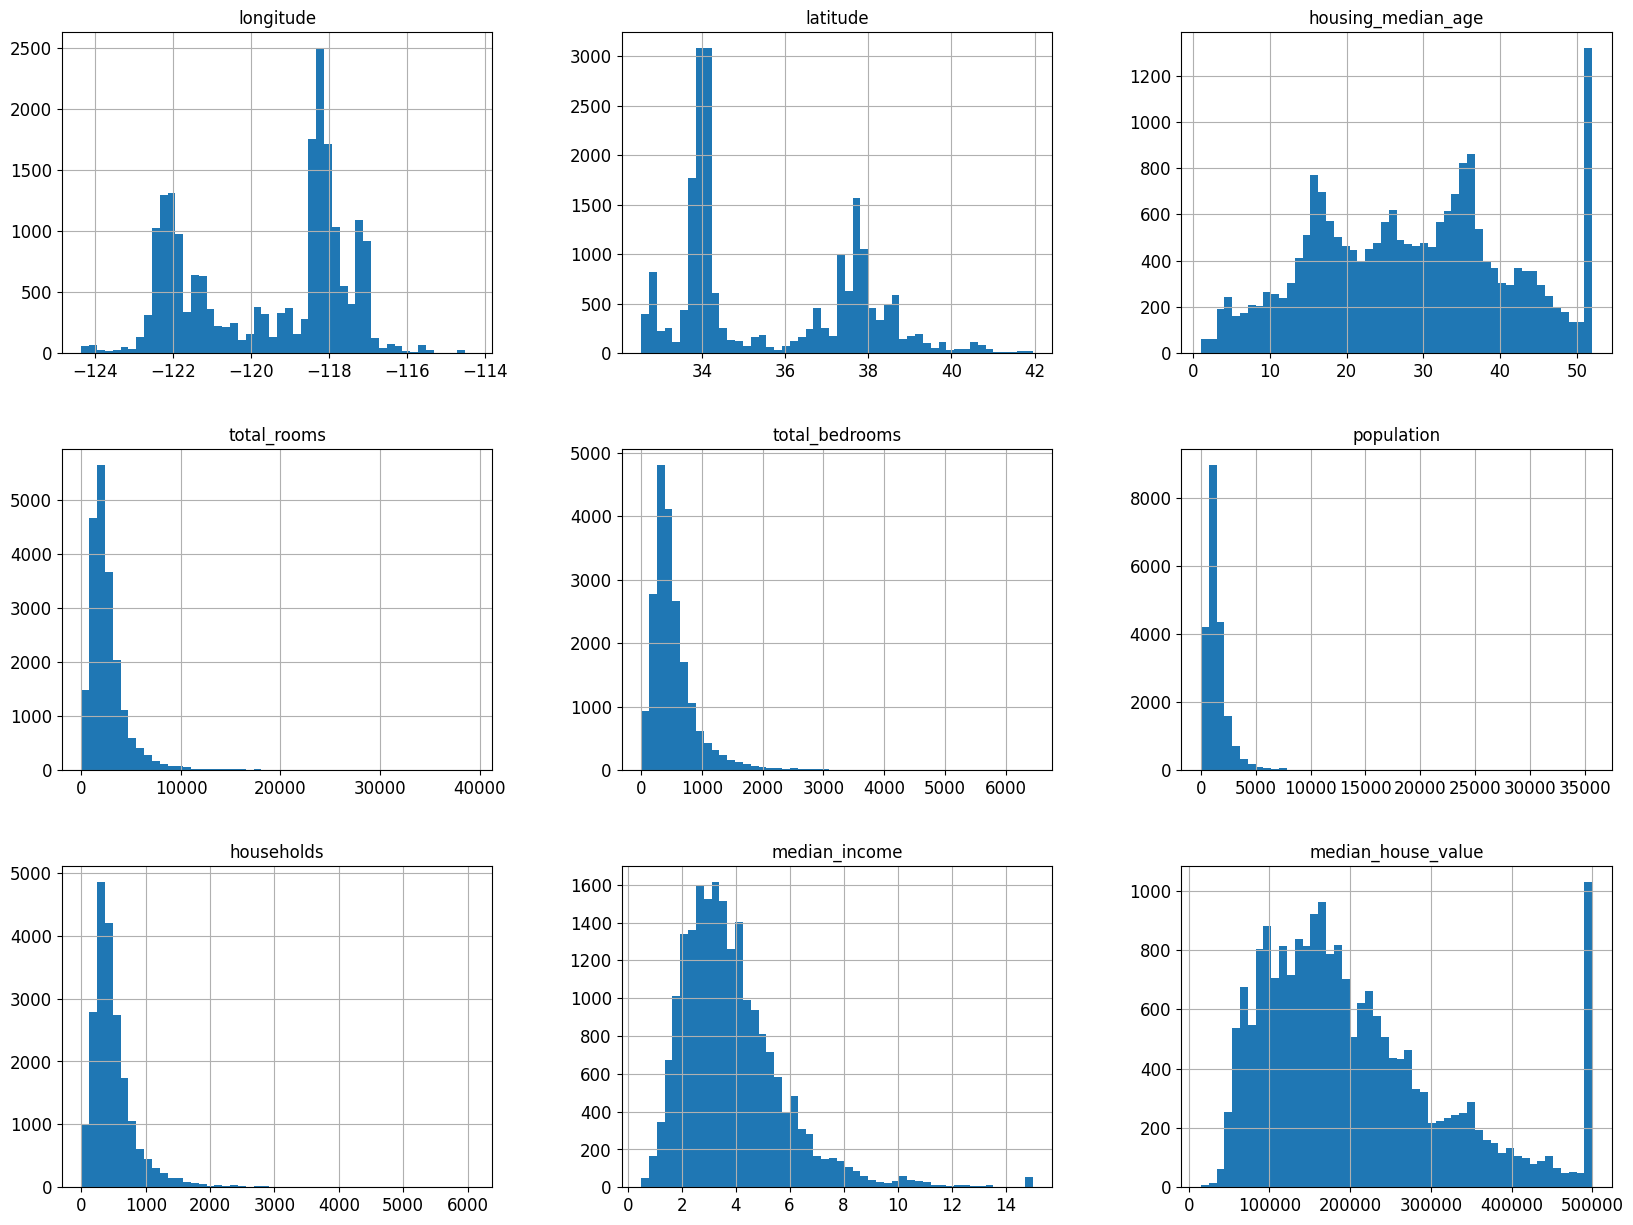

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a test set
Pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside.

In [9]:
# Number 42 has no special property, other than to be the Answer to the Ultimate Question of Life, The Universe, and Everything.
np.random.seed(42)

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


# Discover and virtualize the data to gain insight


## Virtualize data


## Look for data correlations
`corr()` method: compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes.

Note: The correlation coefficient only measures **linear correlations**. It may completely miss out on nonlinear relationships.

Another way to check for correlation between attibutes is to use the pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute.

In [11]:
# Convert the 'ocean_proximity' column to a numerical representation.
housing_for_corr = pd.get_dummies(housing, columns=['ocean_proximity'])

corr_matrix = housing_for_corr.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

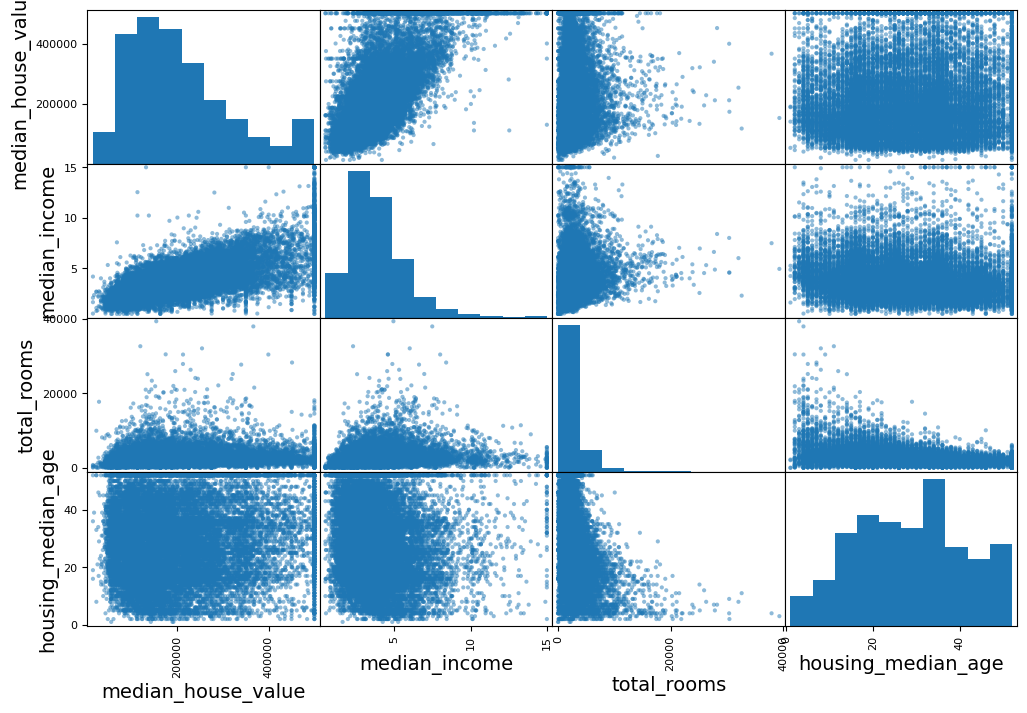

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

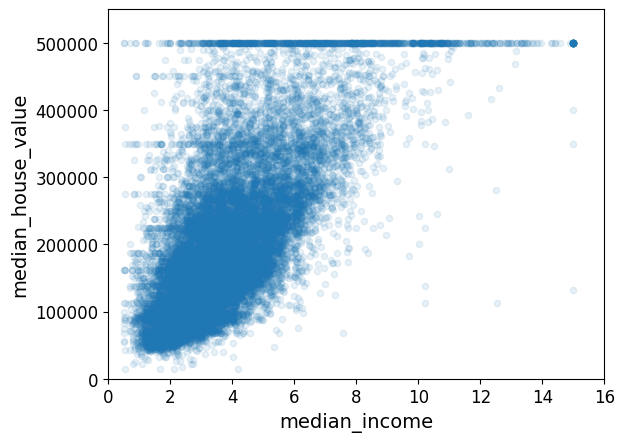

In [13]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Experiment with attribute combinations
Some attributes have a tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm).

# Prepare the data
Feature Engineering  

In [14]:
housing = train_set.drop("median_house_value", axis=1)  # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

## Missing data (or data cleaning)
For an attribute that has some missing values, you have four options:

(1) Get rid of the corresponding data samples by using `dropna()` function.
            
(2) Get rid of the whole attribute or column by using `drop()` function.
            
(3) Set the values to some value (zero, the mean, the median, etc.) by using `fillna()` function or applying Scikit-Learn `SimpleImputer` class. This method is called imputation.
            
(4) Use approach (3) with considering which valules were originally missing and making new columns indicating what will be imputed (refer to Kaggle Intermediate ML course).

In [15]:
# an example using option (3) with median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [16]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [17]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [18]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


## Categorical data
For text or categorical data, there are theree options:

(1) Drop categroical columns.

(2) Ordinal encoding: assign each unique value to a different integer by using Scikit-Learn's `OrdinalEncoder` class.

(3) One-hot encoding: create new columns indicating the presence (or absence) of each possible valule in the original data by using Scikit-Learn's `OneHotEncoder` class.

In [19]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [20]:
# using OneHotEncoder class as an example
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [21]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [22]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature scaling
With few exceptions, ML algorithms don't perform well when the input numerical attributes have very different scales.

Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

(1) Min-max scaling (many people call this **normalization**) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. Scikit-Learn provides a transformer called `MinMaxScaler`.

(2) Standardization: first it substracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Standardization is much less affected by outliers. Scikit-Learn provides a transformer called `StandardScaler` for standardization.

As with all the transfromations, it is important to fit the scalers to the **training data only**, not to the full dataset (including the test set). Only then can you use them to transfrom the training set and the test set (and new data).

## Transformation pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
housing_prepared.shape

(16512, 13)

# Select and train an ML model


## Select a model

In [26]:
# linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# try a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [188628.0772436  290379.8948687  250985.48476349 146878.07878194
 165789.41368924]
Labels:  [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [27]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.93736666226

In [28]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49594.84209472437

Note: underfitting the training data! It can mean that the features do not provide enough information to make good predications, or that the model is not powerful enough.
            
Fix underfitting: select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model.

In [29]:
# decision tree regression model
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross-validation
Note: cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation).

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores:  [79165.28640195 82196.92280915 82050.32438518 84549.17499901
 80355.47360259 78132.00870201 77693.51147251 77918.76392635
 81348.64570181 79985.32545854]
Mean:  80339.54374591203
Standard deviation:  2106.071859808192


Note: A model works very well for training data, but fails to predict new data!

Possible solutions for overfitting: (1) simplify the model, (2) constrain it (i.e., regularize it), (3) get a lot more training data.

In [31]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [65581.45520649 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65861.37192245 69898.33048393
 73117.94692191 69704.17693297]
Mean:  68595.39608481781
Standard deviation:  2496.5245371674655


In [32]:
def model_cross_val_scores(model):
  model_scores = cross_val_score(model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
  model_rmse_scores = np.sqrt(-model_scores)
  display_scores(model_rmse_scores)

In [33]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_cross_val_scores(forest_reg)

Scores:  [47529.08129042 50481.78184929 47532.08537272 50002.49171828
 50257.7056539  46737.00007073 45869.6210029  50874.61181814
 49513.18462059 49711.60333325]
Mean:  48850.91667302309
Standard deviation:  1675.7970043561863


In [34]:
# SVR model
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
model_cross_val_scores(svm_reg)

Scores:  [112959.1246318  115312.49613538 113087.18462154 108462.02135949
 112163.05838196 113155.67180974 109619.43440522 110752.36218244
 113138.55135965 113949.17385771]
Mean:  112259.90787449267
Standard deviation:  1964.6304717367157


## Fine-tune the model
Mehods include Grid Search, Randomized Search, and Ensemble Methods.

## Analyze the model
Such as important features

In [35]:
forest_reg.fit(housing_prepared, housing_labels)
feature_importances = forest_reg.feature_importances_
feature_importances

array([1.05888954e-01, 1.01596825e-01, 5.19353675e-02, 2.33658439e-02,
       2.38185139e-02, 3.25732010e-02, 1.83666222e-02, 4.90641983e-01,
       3.38614792e-03, 1.40924510e-01, 4.54844961e-04, 7.11388306e-04,
       6.33579797e-03])

In [36]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.49064198324772723, 'median_income'),
 (0.14092451019605842, 'INLAND'),
 (0.10588895357327249, 'longitude'),
 (0.10159682537668104, 'latitude'),
 (0.051935367452423824, 'housing_median_age'),
 (0.032573201019363285, 'population'),
 (0.02381851389961618, 'total_bedrooms'),
 (0.02336584388309407, 'total_rooms'),
 (0.018366622203128177, 'households'),
 (0.0063357979658102475, 'NEAR OCEAN'),
 (0.003386147915860476, '<1H OCEAN'),
 (0.0007113883055503545, 'NEAR BAY'),
 (0.00045484496141398595, 'ISLAND')]

# Evaluate on the test set
**Note: Do not use the test set for model selection!!!**

In [37]:
final_model = forest_reg

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48941.70034309343

## Part1: XGBoost model with 100 trees and 42

In [38]:
import numpy as np
!pip install xgboost

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
model_cross_val_scores(xgb_reg)

xgb_reg.fit(housing_prepared, housing_labels)
xgb_predictions = xgb_reg.predict(X_test_prepared)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost RMSE on test set:", xgb_rmse)


Scores:  [47210.12706198 49210.27828613 48186.0462956  49127.00726423
 48288.65884508 47254.78608722 45773.01249197 50489.09611728
 48898.87283346 48606.74133599]
Mean:  48304.46266189511
Standard deviation:  1242.4292425364024
XGBoost RMSE on test set: 47612.81479613856


## Part2: Lazy Predict

In [39]:
!pip install lazypredict

In [40]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = reg.fit(housing_prepared, housing_labels, X_test_prepared, y_test)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(housing_prepared, X_test_prepared, housing_labels, y_test)

print("RandomForest RMSE: ", final_rmse)
print("XGBoost RMSE: ", xgb_rmse)
df = pd.DataFrame(models)
df


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 74%|███████▍  | 31/42 [06:07<00:48,  4.44s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|█████████▌| 40/42 [06:51<00:09,  4.69s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207194.693738


100%|██████████| 42/42 [06:52<00:00,  9.82s/it]

RandomForest RMSE:  48941.70034309343
XGBoost RMSE:  47612.81479613856


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.83,0.83,47570.28,0.40
XGBRegressor,0.83,0.83,47612.81,0.51
HistGradientBoostingRegressor,0.82,0.82,48058.20,0.69
RandomForestRegressor,0.82,0.82,48941.70,17.87
BaggingRegressor,0.80,0.80,51301.03,5.76
ExtraTreesRegressor,0.79,0.79,52281.41,15.41
GradientBoostingRegressor,0.76,0.76,55903.12,4.79
KNeighborsRegressor,0.71,0.71,61397.95,0.72
DecisionTreeRegressor,0.63,0.63,69175.77,0.87
